## Autoencoders

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import jax as jax
import jax.numpy as jnp

Let's start with an auto-associative case: the output layer is an approximation of the input one. In particular we start considering a linear autoencoders so the transformation functions are two matrices.

In [43]:
image = plt.imread('Lena.jpg').astype(np.float32)
image.shape

(256, 256)

In [44]:
np.random.seed(0)
n = 256 # input shape of the autoencoder
p = 64

# linear transformation matrixes
B = np.random.randn(n,p)
A = np.random.randn(p,n)
print(B.shape, A.shape)

(256, 64) (64, 256)


Structure of the autoencoder: $$\begin{bmatrix}x_{1,1} & x_{1,2} & \dots & x_{1,255} & x_{1,256} \\ x_{2,1} & x_{2,2} & \dots & x_{2,255} & x_{2,256} \\ \vdots & \vdots & \ddots & & \vdots \\ x_{255,1} & x_{255,2} &  & \ddots & \vdots \\ x_{256,1} & x_{256,2} & \dots & \dots& x_{256,256}\end{bmatrix}\begin{bmatrix}b_{1,1} & b_{1,2} & \dots & b_{1,63} & b_{1,64} \\ b_{2,1} & b_{2,2} & \dots & b_{2,63} & b_{2,64} \\ \vdots & \vdots & \ddots & & \vdots \\ b_{255,1} & b_{255,2} &  & \ddots & \vdots \\ b_{256,1} & b_{256,2} & \dots & \dots& b_{256,64}\end{bmatrix}\begin{bmatrix}a_{1,1} & a_{1,2} & \dots & a_{1,63} & a_{1,64} \\ a_{2,1} & a_{2,2} & \dots & a_{2,63} & a_{2,64} \\ \vdots & \vdots & \ddots & & \vdots \\ a_{255,1} & a_{255,2} &  & \ddots & \vdots \\ a_{256,1} & a_{256,2} & \dots & \dots& a_{256,64}\end{bmatrix}^\intercal$$
So:
$$\mathbf{X}@\mathbf{B}@\mathbf{A} = \tilde{X}$$

In [45]:


# plot
def showImage(image, y, x):
    plt.figure(figsize=(10,5))
    plt.subplot(1,3,1)
    plt.imshow(image, cmap='gray')
    plt.title('Original')
    plt.axis('off')
    plt.subplot(1,3,2)
    plt.imshow(y, cmap='gray')
    plt.title('Encoded')
    plt.axis('off')
    plt.subplot(1,3,3)
    plt.imshow(x, cmap='gray')
    plt.title('Decoded')
    plt.axis('off')
    plt.show()

(256, 64)
(256, 256)


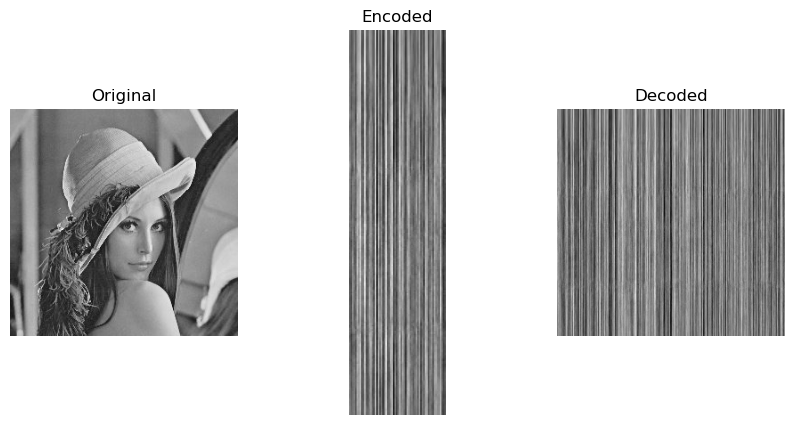

In [46]:
# encode
y = np.dot(image, B)
print(y.shape)
# decode
x = np.dot(y, A)
print(x.shape)

showImage(image, y, x)

In [47]:
loss_history = []

for epoch in range(100):
    y = np.dot(image, B)
    x = np.dot(y, A)
    loss = np.mean((image - x)**2)
    grad = jax.grad(loss)
    B = B - 0.01 * grad
    loss_history.append(loss)


TypeError: Expected a callable value, got 292258460.40265346

In [3]:
# This dataset is contained in the sample data directory of Google Colab online runtimes
data = np.genfromtxt('./mnist_train_small.csv', delimiter=',')
data.shape
labels_full = data[:,0]
A_full = data[:,1:].transpose()
labels_full.shape, A_full.shape
first_image = A_full[:,1].reshape((28,28))

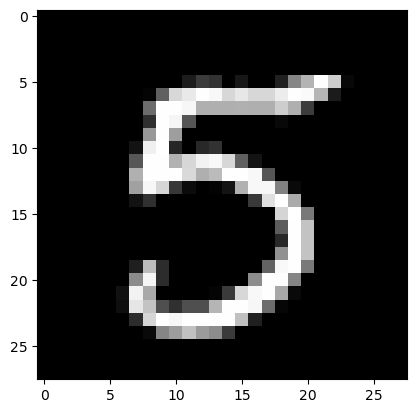

In [4]:
plt.imshow(first_image, cmap='gray')

Epoch 0, Loss: 84033660.28364839
Epoch 100, Loss: nan
Epoch 200, Loss: nan
Epoch 300, Loss: nan
Epoch 400, Loss: nan
Epoch 500, Loss: nan
Epoch 600, Loss: nan


/tmp/ipykernel_1486132/3046745837.py:37: RuntimeWarning: overflow encountered in square
  loss = np.mean((X.flatten() - decoded)**2)
/home/lorenzobozzoni/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/lorenzobozzoni/anaconda3/lib/python3.11/site-packages/numpy/core/numeric.py:943: RuntimeWarning: invalid value encountered in multiply
  return multiply(a.ravel()[:, newaxis], b.ravel()[newaxis, :], out)


Epoch 700, Loss: nan
Epoch 800, Loss: nan
Epoch 900, Loss: nan


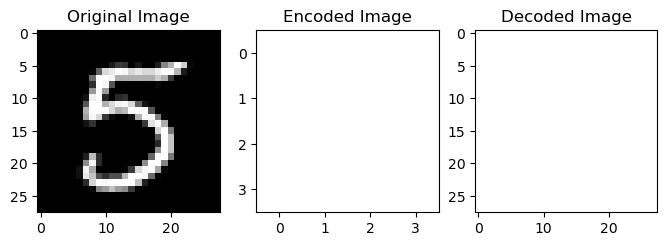

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

class LinearAutoencoderImage:
    def __init__(self, input_size, encoding_size):
        self.input_size = input_size
        self.encoding_size = encoding_size

        # Initialize weights and biases for the encoder and decoder
        self.encoder_weights = np.random.randn(encoding_size, input_size)
        self.encoder_biases = np.zeros((encoding_size, 1))

        self.decoder_weights = np.random.randn(input_size, encoding_size)
        self.decoder_biases = np.zeros((input_size, 1))

    def encode(self, X):
        # Encoder operation
        encoded = np.dot(self.encoder_weights, X.flatten()) + self.encoder_biases.flatten()
        #print('Encoded image shape: {}'.format(encoded.shape))
        return encoded

    def decode(self, encoded):
        # Decoder operation
        decoded = np.dot(self.decoder_weights, encoded) + self.decoder_biases.reshape(self.input_size)
        #print('Decoded image shape: {}'.format(decoded.shape))
        return decoded #.reshape((self.input_size, 1))

    def train(self, X, learning_rate=0.01, epochs=1000):
        loss_history = []
        for epoch in range(epochs):
            # Forward pass
            encoded = self.encode(X)
            decoded = self.decode(encoded)

            # Compute loss (mean squared error)
            loss = np.mean((X.flatten() - decoded)**2)
            loss_history.append(loss)

            # Backward pass (gradient descent)
            error = decoded - X.flatten()
            decoder_gradient = np.outer(error, encoded)
            encoder_gradient = np.dot(self.decoder_weights.T, error)

            # Update weights and biases
            self.decoder_weights -= learning_rate * decoder_gradient
            self.decoder_biases -= learning_rate * np.sum(error)
            self.encoder_weights -= learning_rate * np.outer(encoder_gradient, X.flatten())
            self.encoder_biases -= learning_rate * np.sum(encoder_gradient)

            # Print loss for every 100 epochs
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss}')
        
        return loss_history

# Load an example image (grayscale)
image_path = 'Lena.jpg'  # Replace with the path to your image
image = Image.open(image_path).convert('L')  # Convert to grayscale
image_array = np.array(image) / 255.0  # Normalize pixel values to the range [0, 1]


image_array = first_image # using mnist image

# Flatten the image for input to the autoencoder
input_size = image_array.size
encoding_size = 16  # Choose an appropriate encoding size

# Create and train the linear autoencoder for the image
autoencoder_image = LinearAutoencoderImage(input_size, encoding_size)
loss_hist = list()
loss_hist = autoencoder_image.train(image_array, learning_rate=0.01, epochs=1000)

# Encode and decode the image
encoded_image = autoencoder_image.encode(image_array)
decoded_image = autoencoder_image.decode(encoded_image)

# Reshape the decoded image and display the results
decoded_image = decoded_image.reshape(image_array.shape)
plt.figure(figsize=(8, 4))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image_array, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Encoded Image')
plt.imshow(encoded_image.reshape((4, 4)), cmap='gray')  # Assuming encoding_size = 64

plt.subplot(1, 3, 3)
plt.title('Decoded Image')
plt.imshow(decoded_image, cmap='gray')

plt.show()


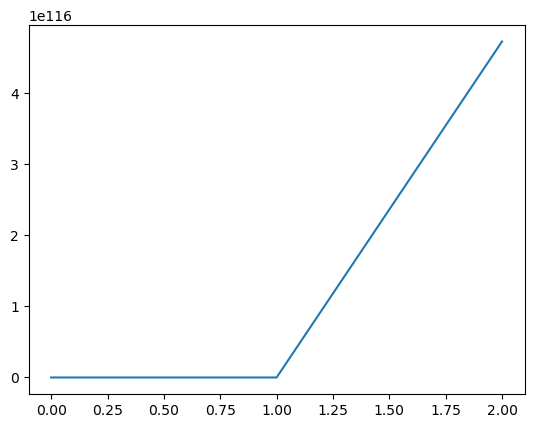

In [50]:
plt.plot(loss_hist)

In [ ]:
def LinearAutoencoder